In [46]:
import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pickle
import geopandas as gpd

In [2]:
to_load=os.listdir(os.path.join(os.getcwd(), "Datascrapes"))

li = []
for csv in to_load: 
    df=pd.read_csv(os.path.join(os.getcwd(), "Datascrapes", csv), parse_dates=['timestamp'], index_col = [0])
    li.append(df)

df=pd.concat(li)
df.to_pickle('./data_usage_combined.pkl')

c:\Users\glh287\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


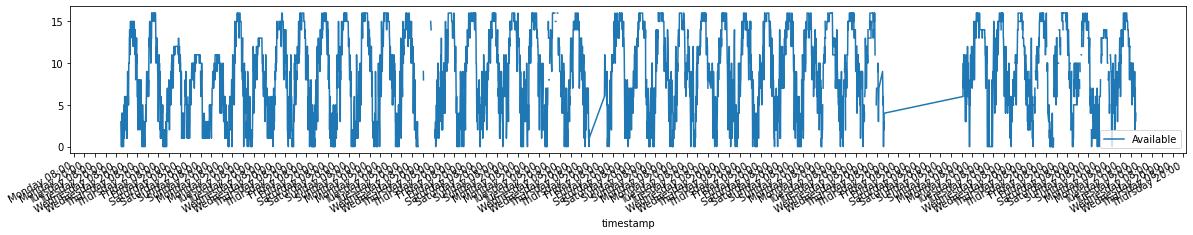

In [4]:
hours = mdates.HourLocator(interval = 12)
h_fmt = mdates.DateFormatter('%A %H:%M')


df_sub = df[df.Id == 12949]
df_sub.timestamp=df_sub.timestamp.dt.round('10min')

ax=df_sub.plot(x='timestamp', y='Available', figsize=(20,3),x_compat = True)
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)

plt.show()

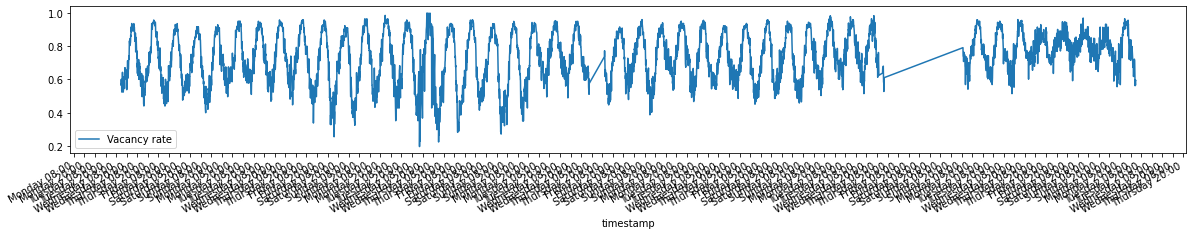

In [5]:

df_sub = df.copy()
df_sub.timestamp=df_sub.timestamp.dt.round('10min')
df_sub = df_sub.groupby('timestamp', as_index = False).sum()
df_sub['Vacancy rate'] = df_sub.Available / df_sub.Total


ax=df_sub.plot(x='timestamp', y='Vacancy rate', figsize=(20,3),x_compat = True)
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)

plt.show()

In [42]:
with open(os.path.join('C:\\Users\\glh287\\OneDrive\Phd\\GreenCar projekt\\Charging stations\\Charging-stations','Charger_stations_location_.pickle'), 'rb') as f:
    id_location = pickle.load(f)

keys = []
lats = []
lngs = []
for dict_ in id_location:
    for key,value in dict_.items():
        keys.append(key)
        lats.append(value[0])
        lngs.append(value[1])

df = pd.DataFrame({
    'Id': keys,
    'Latitude': lats,
    'Longitude': lngs
})
df

gdf_clever = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))